<a href="https://colab.research.google.com/github/skyteck8/BigDataMachineLearning/blob/main/SNS_ACT1_1_carlosJavierDelgadoBola%C3%B1os.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

carlos Javier Delgado Bolaños

En este cuaderno se ofrecen la siguientes recetas para la creación/subida/descarga de ficheros con diversas librerías:



* Desde el sistema de archivos local de Google Colab
   * Subir/Descargar archivos desde/hacia el sistema de archivos local a Google Colab
   * Descargar archivos en el sistema de archivos local
* Desde Google Drive al entorno de Google Colab
   * Activar(Montar) Google Drive
   * Crear un archivo/directorio en Drive desde Google colab
   * Uso de PyDrive desde Google colab para crear o ver contendos de archvo en Google Drive
* Haciendo uso de API de REST de Drive
   * Desde entorno de Google Colab copia ficheros a Google Drive	y lee su contenido
* Haciendo uso de la librería Google Spread Sheet (gspreed)
   * Crear una hoja de cálculo de Google
   * Acceder al contenido de la hoja de cálculo e insertar datos
   * Descargar datos de una hoja de cálculo en Python como un DataFrame de Pandas
* Descargar datos desde GitHub en un dataframe




De todas formas en la siguiente publicación se ofrecen también unas opciones muy interesantes:

Título: [7 ways to load external data into Google Colab](https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7)

# Sistema de archivos local de Google Colab

Existe la posibilidad manual de subir o descargar desde el navegador de archivos que ofrece Google colab cuando estamos utilizando un notebook

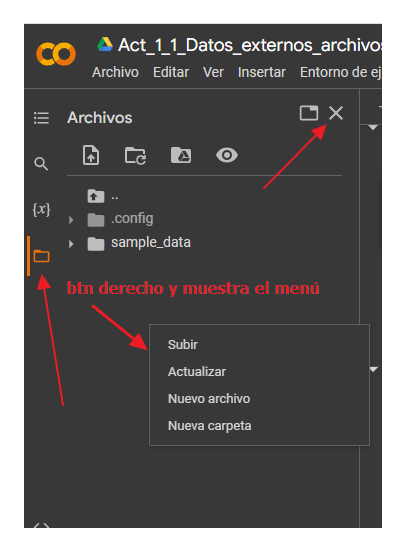

Tener en cuneta que los archivos que se suben durante la ejecuci´n de un notebook, posteriormente se borrar al terminar la sesión enla que se han creado.

# Subir ficheros con Python desde el sistema local a los archivos de la sesión del notebook actual

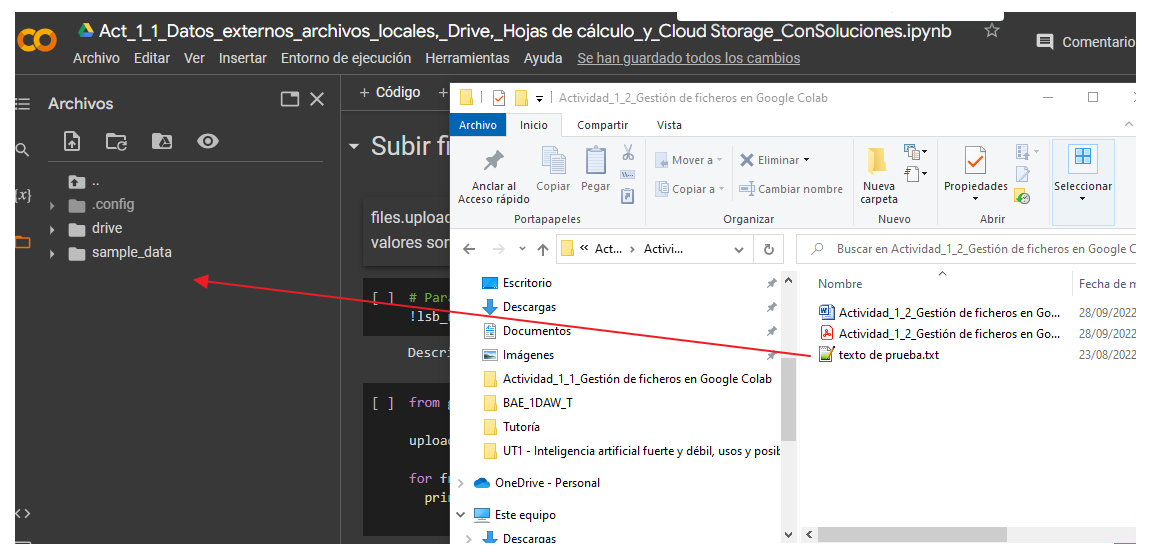

files.upload muestra un diccionario de los archivos que se cargaron. El diccionario está codificado según el nombre de archivo y los valores son los datos que se subieron.

In [ ]:
# Para conocer la versión de Linux donde se ejecuta nuestro cuaderno en Google Colab
!lsb_release -d

Description:	Ubuntu 22.04.2 LTS


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving statics.sh to statics.sh
User uploaded file "statics.sh" with length 2360 bytes


In [ ]:
#Ejer 01: Crear en el PC un fichero con un contenido de Loren Ipsum y subirlo
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving losreIpsum.txt to losreIpsum.txt
User uploaded file "losreIpsum.txt" with length 9198 bytes


## Descargar archivos en el sistema de archivos local

<code>files.download</code> invocará una descarga del archivo desde el navegador a tu PC local.


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Ejer 02: Descargar el fichero subido en el apartado anterior
from google.colab import files

with open('loreIpsum.txt', 'w') as f:
  f.write('some content')

files.download('loreIpsum.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Google Drive

Puedes acceder a archivos en Drive de varias maneras, incluidas las siguientes:
- Activación de Google Drive en la máquina virtual del entorno de ejecución y conbinarlo con instrucciones de Linux
- Usar un wrapper alrededor de la API, como <a href="https://pythonhosted.org/PyDrive/">PyDrive</a>
- Usar la <a href="https://developers.google.com/drive/v3/web/about-sdk">API nativa de REST</a>



Puedes ver ejemplos de cada caso más abajo.

## Activar (Montar) Google Drive de forma local

El ejemplo siguiente muestra cómo activar/montar Google Drive en el entorno de ejecución mediante un código de autorización y cómo escribir y leer archivos allí. Una vez ejecutado, podrás ver el archivo nuevo &#40;<code>foo.txt</code>&#41; en <a href="https://drive.google.com/">https://drive.google.com/</a>.

Esta configuración solo permite leer, escribir y mover archivos. Para modificar de forma programática la configuración de uso compartido o algún otro metadato, prueba con las opciones de más abajo.

<strong>Nota:</strong> Si utilizas el botón "Activar unidad de Drive" en el navegador de archivos, no necesitas ningún código de autenticación para los notebooks que solo modificó el usuario actual. ***No entiendo esta nota***

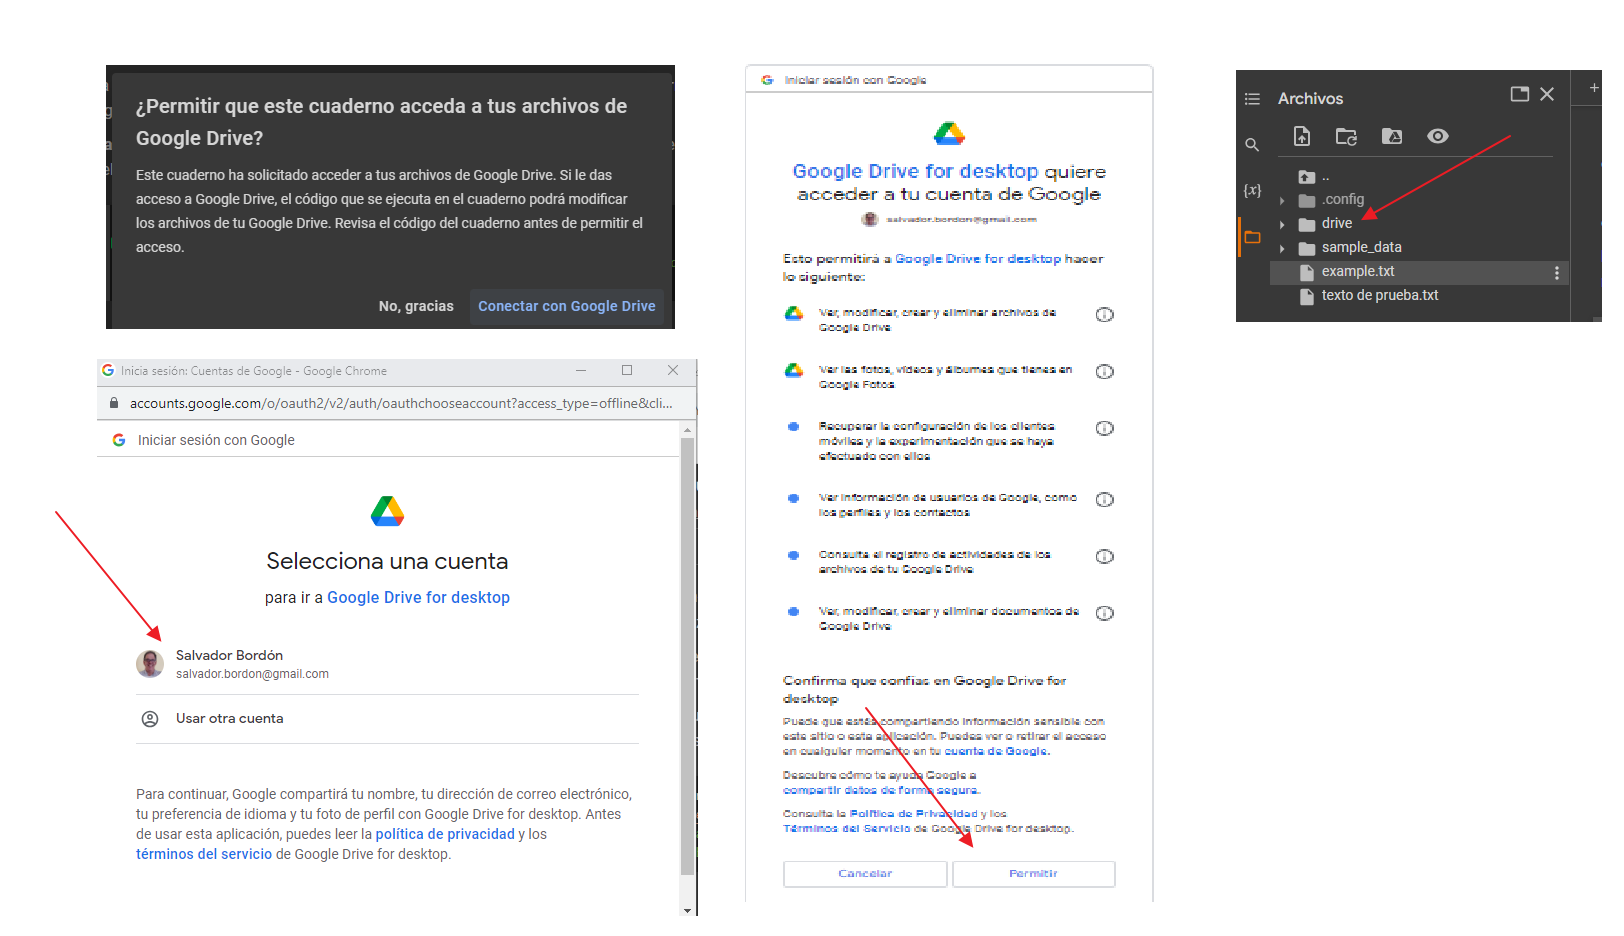

In [ ]:
# Muestra las unidades montadas
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   27G   82G  25% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G  1.4M  6.4G   1% /var/colab
/dev/sda1        44G   28G   16G  64% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Observar que al montar la carpeta se puede navegar en Google Drive desde el explorar de carpetas que está a la
# izquierda en Google Colab

Mounted at /content/drive


In [ ]:
# Muestra las unidades montadas
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   27G   82G  25% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G  1.4M  6.4G   1% /var/colab
/dev/sda1        44G   28G   16G  64% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           108G   67G   41G  63% /content/drive


In [ ]:
# Aunque reiniciemos el entorno de ejecución la unidad continúa montada

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Crear un fichero en Drive desde Google Colab

 Desde el notebook crear un fichero en Google Drive y ver/leer su contenido con un comando Linux

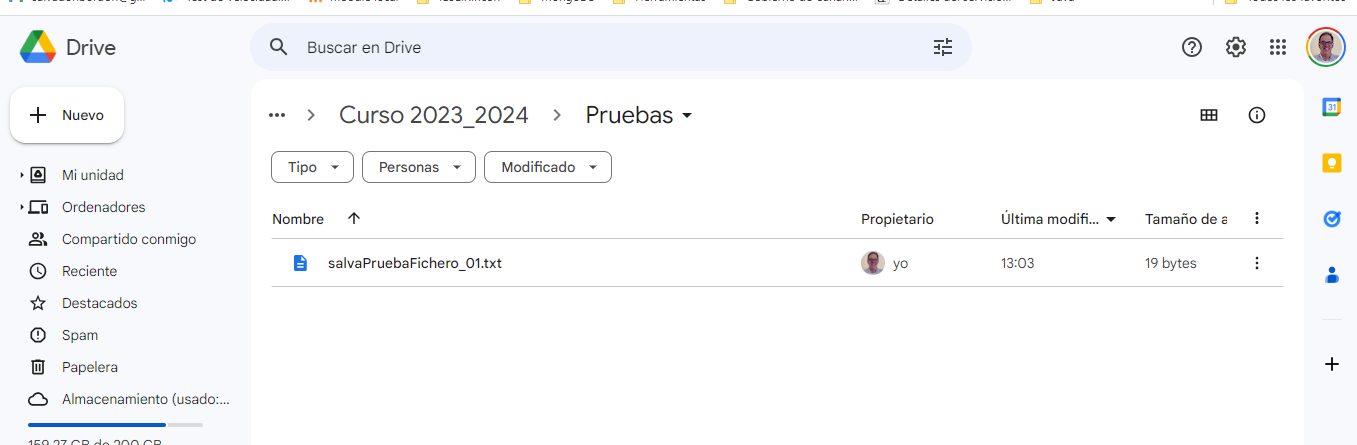

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/salvaPruebaFichero_01.txt', 'w') as f:
  f.write('Hello Google Drive 01!')
#!cat /Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/salvaPruebaFichero_01.txt
!cat '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/salvaPruebaFichero_01.txt'

Hello Google Drive 01!

## Desmonta las unidades montadas

Para desmontar las unidades montadas

In [ ]:
drive.flush_and_unmount()

In [ ]:
# Muestra las unidades montadas
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   27G   82G  25% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G  1.5M  6.4G   1% /var/colab
/dev/sda1        44G   28G   16G  64% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!ls -l

total 12
-rw-r--r-- 1 root root   12 Sep 27 11:51  example.txt
drwxr-xr-x 1 root root 4096 Sep 25 13:55  sample_data
-rw-r--r-- 1 root root  574 Sep 27 11:49 'texto de prueba.txt'


## Crear un directorio en Google Drive

In [ ]:
from google.colab import drive
drive.flush_and_unmount # Lo utilizo para poder hacer el ejemplo con autonomía de otras celdas

drive.mount('/content/drive', force_remount=True)

!mkdir '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024'



Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024’: No such file or directory


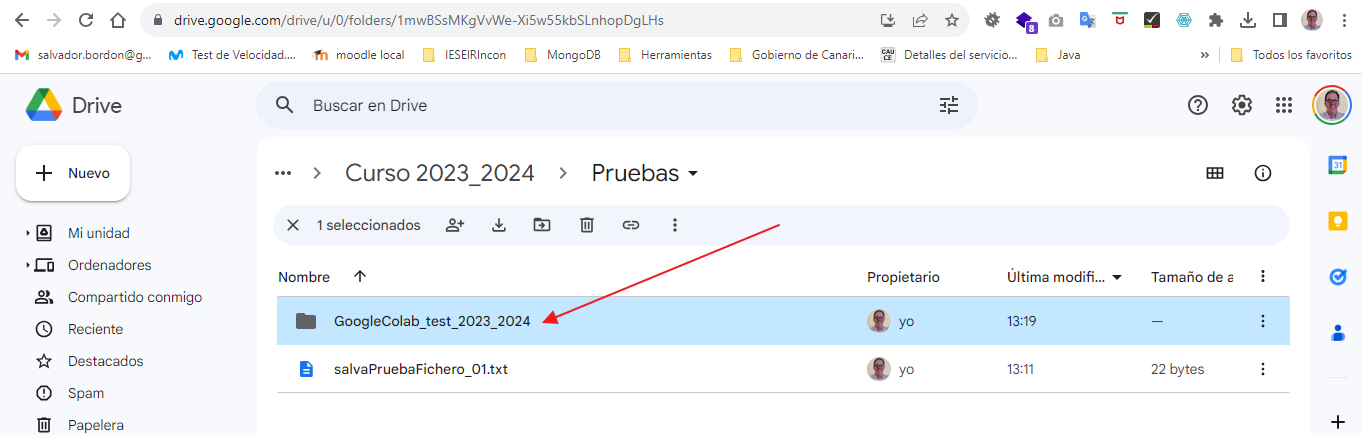

In [ ]:


from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive', force_remount=True)

# Crear el directorio
!mkdir -p '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024'

# Crear un archivo de texto con Lorem Ipsum
path = '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024/lorem_ipsum.txt'
with open(path, 'w') as f:
    f.write('Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.')

# Verificar la creación del directorio y el archivo
!ls '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024'

## Uso de PyDrive



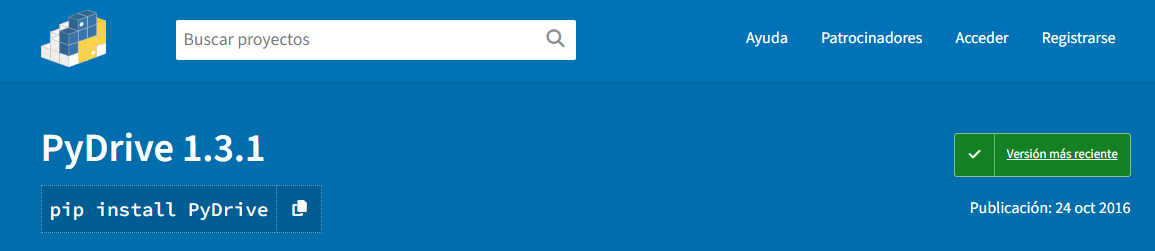

PyDrive es una librería de google-api-python-client que facilita muchas de las tareas habituales de Google Drive API.

**Título**: PyDrive 1.3.1

**UrL**: https://pypi.org/project/PyDrive/


En los ejemplos que aparecen a continuación, se muestran la autenticación y la carga y descarga de archivos mediante PyDrive. Puedes encontrar más ejemplos en la <a href="https://pythonhosted.org/PyDrive/">documentación de PyDrive</a>.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Autentica y crea el cliente de PyDrive.

Al igual que en la sección anterior, si no tenemos activada la autorización de acceso a Drive, entonces nos la pedirá.


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Crea y sube un archivo de texto.


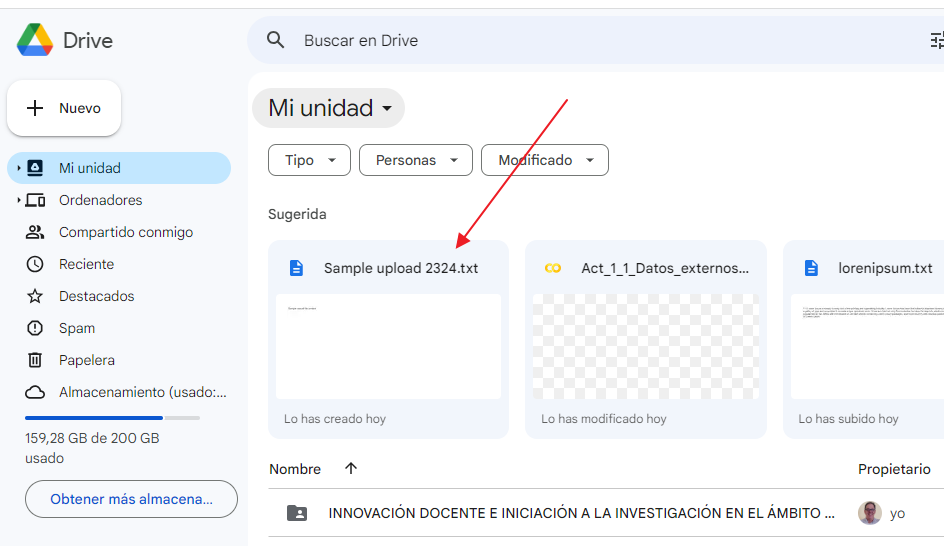

In [ ]:
uploaded = drive.CreateFile({'title': 'Sample upload 2324.txt'})
uploaded.SetContentString('Sample upload file content')
# En este caso lo ccrea y sube en el direcotio raíz de Drive, en el caso de que deseemos utilizar un directorio en concreto se lo pasamos por parámetro
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1bKyCoYUQrqq8f6zMptj9NBjV35h5nVG-


Carga un archivo por su ID y luego imprime su contenido. En este ejemplo utiliza el objeto uploaded de la celda anterior


In [ ]:
file = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(file.GetContentString()))

Downloaded content "Sample upload file content"


In [ ]:
# Para mostrar los directorios/ficheros y sus id's
# Fijarse que el nombre del fichero/directorio se identificaca con "Title"
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))

In [ ]:
#Ejer 04: En la carpeta creada en el ejercicio anterior (GoogleColab_test_Ejer_23_24), crear un fichero cuyo nombre sean tu nombre y apellidos,
# en su contenido incluir un texto LorenIpsum distinto al utilizado en el punto anterior (de 50 palabras y añadir tu nombre al principio)
# y al terminar mostrar su contenido.
# Similar al ejemplo. Validar su existencia consultando Gdrive.ListFile  y el explorador de archivos de GoogleColab en este notebook

# Url's de referencia:
#    https://pythonhosted.org/PyDrive/filemanagement.html
#    https://pythonhosted.org/PyDrive/filelist.html#get-all-files-which-matches-the-query
#    https://stackoverflow.com/questions/56434084/google-pydrive-uploading-a-file-to-specific-folder

from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import os

# Montar Google Drive
drive.mount('/content/drive', force_remount=True)

# Autenticación para PyDrive
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Crear archivo
nombre_archivo = 'Carlos Bolaños.txt'
contenido = 'Carlos Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.'
ruta_carpeta = '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

with open(ruta_completa, 'w') as f:
    f.write(contenido)

# Mostrar el contenido del archivo
with open(ruta_completa, 'r') as f:
    print(f.read())

# Verificar la existencia del archivo en Google Drive usando PyDrive
folder_id = '' # Necesitas proporcionar el ID de la carpeta aquí
query = f"'{folder_id}' in parents and trashed=false"
file_list = drive.ListFile({'q': query}).GetList()
archivo_encontrado = False
for file in file_list:
    if file['title'] == nombre_archivo:
        print('Archivo encontrado en Google Drive:', file['title'])
        archivo_encontrado = True
        break
if not archivo_encontrado:
    print('Archivo no encontrado en Google Drive')

# Verificar en el explorador de archivos de Colab
!ls "{ruta_carpeta}"


Mounted at /content/drive
Carlos Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.


HttpAccessTokenRefreshError: Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=True from the Google Compute Enginemetadata service. Response:
{'metadata-flavor': 'Google', 'date': 'Wed, 24 Jan 2024 21:46:51 GMT', 'content-length': '0', 'status': '404'}

In [ ]:
#Ejer 05: Mostrar una lista de los ficheros que existen en el directorio GoogleColab_test_Ejer_23_24
# url de referencia: https://pythonhosted.org/PyDrive/quickstart.html#creating-and-updating-file

# Para mi solución utilicé la siguiente publicación: https://stackoverflow.com/questions/40224559/list-of-file-in-a-folder-drive-api-pydrive

# Verificar la creación del directorio y el archivo

!ls '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024'


'Carlos Bolaños.txt'   lorem_ipsum.txt


## API de REST de Drive




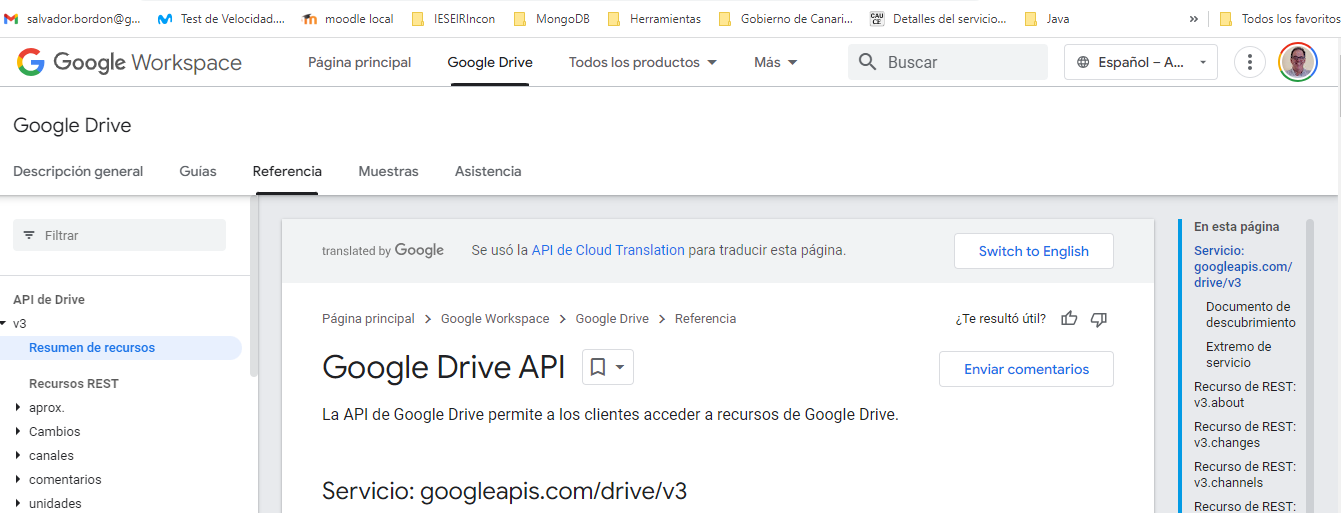

Para usar la API de Drive, primero debemos autenticar y construir un cliente de API.

Al igual que en la sección anterior, si no tenemos activada la autorización de acceso a Drive, entonces nos la pedirá.

In [ ]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

Con este cliente, podemos usar cualquiera de las funciones de la <a href="https://developers.google.com/drive/v3/reference/">referencia de la API de Google Drive</a>. Puedes ver algunos ejemplos debajo.


### Crear un archivo de Drive nuevo con datos de Python

Primero, crea un archivo en el serv idor de Google Colab para poder subirlo/copiarlo después a Google Drive.

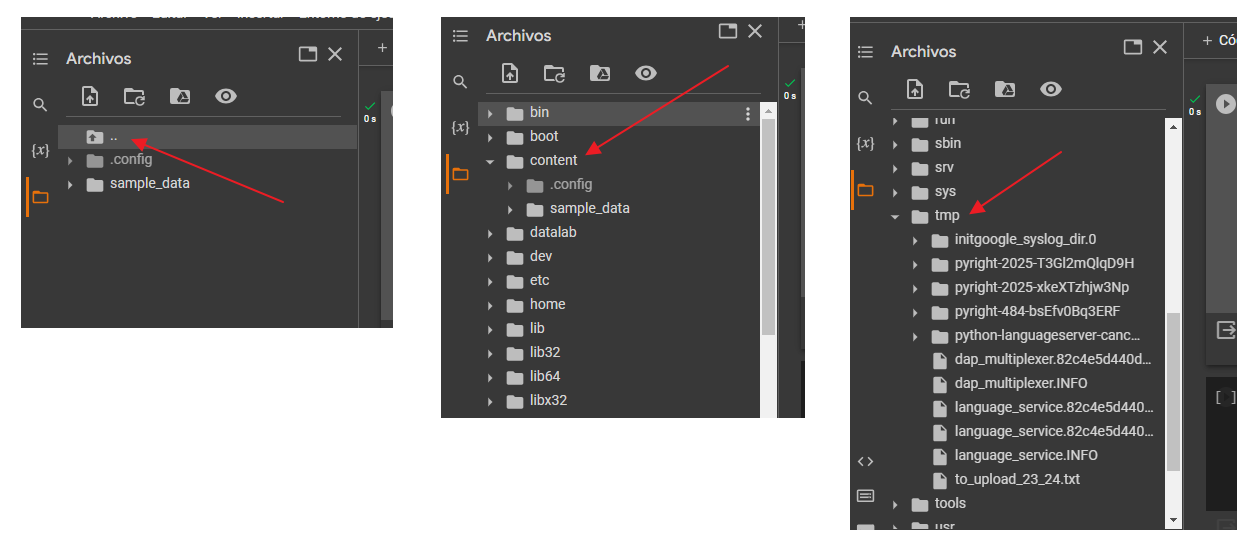

In [ ]:
# No entiendo/veo dónde se está creando este fichero, ya que la carpeta tmp no existe en drive
# Explicación: en el panel navegador de la izquierda pichar en la carpeta con los dos puntos
#              Y se accede a la ruta de archivos de linux; donde se encuentra la carpeta tmp.
# Es en la carpeta content donde se encuentran los ficheros que subimos a Google Colab
# Nota: Una vez que se accede a la carpeta padre y se sube un fichero, lo hará a la carpeta raíz.

# Esta es la forma de crear un fichero desde Python, en este caso en la ruta del servidor de Google colab que le indicamos.

with open('/tmp/to_upload_23_24.txt', 'w') as f:
  f.write('Este año tenenmos nuevos retos.')

print('/tmp/to_upload_23_24.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload_23_24.txt contains:
cat: /tmp/to_upload.txt: No such file or directory


In [ ]:
# Esta sentencias es para  mostrar en Goggle colab la carpeta del Drive, de todas formas si pichas en el icono de la izq. con
# el logo de la Carpeta y Drive, entonces te genera este código.

# No formaba parte de esta sección pero la incluí porque interesaba mostrarla para verificar si se creaba o
# no el fichero de la celda anterior

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sube el archivo anterior a Google Drive, con el nombre "Sample file" ,utilizando el método <a href="https://developers.google.com/drive/v3/reference/files/create"><code>files.create</code></a>. Puedes encontrar más detalles sobre cómo subir archivos en la <a href="https://developers.google.com/drive/v3/web/manage-uploads">documentación para desarrolladores</a>.

In [ ]:

from googleapiclient.http import MediaFileUpload


file_metadata = {
  'name': 'Sample file 23_24',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/tmp/to_upload_23_24.txt',
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

# Es curioso porque una vez que se crea desde este código un archivo de Texto, cunado se intenta modificar desde Drive
# entonces sólopermitirá ver su contenido y si se habre con el editor de Google doc, entonces creará un
# nuevo fichero.


File ID: 1V0VyPdIUcXORUBe37iU1sbCFzdAVL2GH


Después de ejecutar la celda anterior, se mostrará un archivo nuevo con el nombre "Sample file" en <a href="https://drive.google.com/">https://drive.google.com/</a>.

Comentar las diferencias **entre los nombres** de los ficheros en el entorno de Google colab y el entorno de Google Drive.

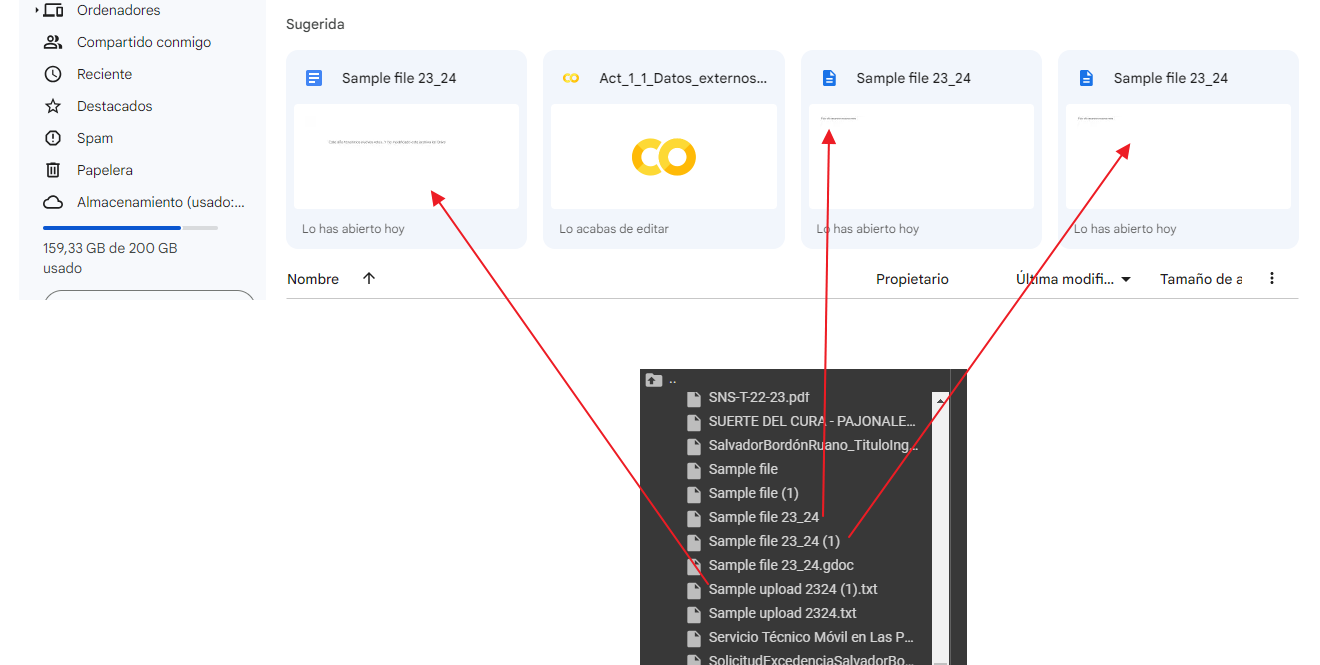


### Descargar datos de un archivo de Drive a un archivo lógico

Descarga el archivo que subimos anteriormente.

In [ ]:
file_id = created.get('id')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))

Downloaded file contents are: b'Este a\xc3\xb1o tenenmos nuevos retos.'


Para descargar un archivo diferente, establece el <code>file&#95;id</code> anterior con el ID de ese archivo, que se verá así: "1uBtlaggVyWshwcyP6kEI-y&#95;W3P8D26sz".

In [ ]:
# Ejer 06: Haciendo uso de la api (ejemplo anterior) descargar/mostrar el contenido del fichero que creaste con contenido LorenIpsum
#       en la carpeta GoogleColab_test_Ejer y con el nombre tuyo.

import os

# Especifica el nombre del archivo y la ruta
nombre_archivo = 'Carlos Bolaños.txt'  # Reemplaza con el nombre real del archivo
ruta_carpeta = '/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

# Verificar si el archivo existe
if os.path.exists(ruta_completa):
    # Leer y mostrar el contenido del archivo
    with open(ruta_completa, 'r') as file:
        contenido = file.read()
        print(contenido)
else:
    print("El archivo no existe o la ruta es incorrecta.")

Carlos Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.


In [ ]:
os.path.exists('/content/drive/My Drive/Colab Notebooks/Módulo SNS/Curso 2023_2024/Pruebas/GoogleColab_test_2023_2024/Carlos Bolaños.txt')

True

# Hojas de cálculo de Google

Los ejemplos de abajo usan la biblioteca de código abierto <a href="https://github.com/burnash/gspread"><code>gspread</code></a> para interactuar con Hojas de cálculo de Google.

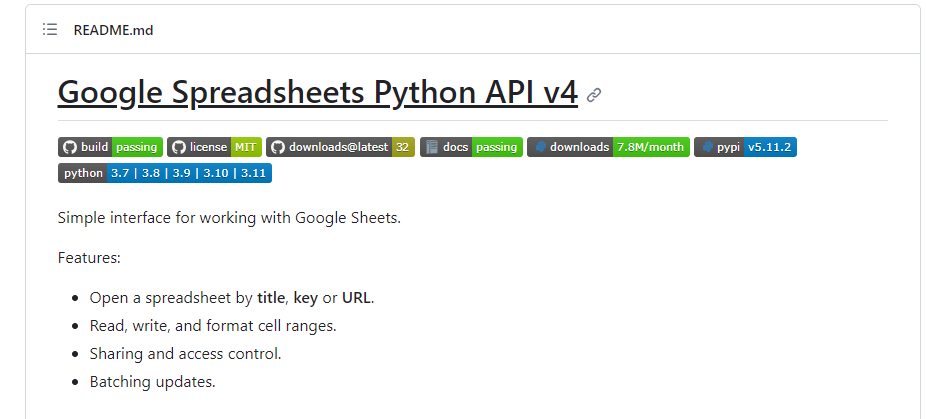

Importa la biblioteca, autentica y crea la interfaz para Hojas de cálculo.

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

A continuación, verás un pequeño conjunto de ejemplos de <code>gspread</code>. Puedes encontrar más ejemplos en la <a href="https://github.com/burnash/gspread#more-examples">página de GitHub de <code>gspread</code></a>.

## Crear una hoja nueva con datos de Python

In [ ]:
# Crea la hoja de cálcula en el directorio raíz de Google Drive
sh = gc.create('My cool spreadsheet_23_24')

Después de ejecutar la celda anterior, se mostrará una nueva hoja de cálculo con el nombre "My cool spreadsheet" en <a href="https://sheets.google.com/">https://sheets.google.com</a>.

Abre la hoja nueva y agrega datos aleatorios.

In [ ]:
worksheet = gc.open('My cool spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)

{'spreadsheetId': '1f31Qy3Cffc3Ubj01KhGEbkiAQeF2PlZyJkYOtdqYxcs',
 'updatedRange': "'Hoja 1'!A1:C2",
 'updatedRows': 2,
 'updatedColumns': 3,
 'updatedCells': 6}

## Descargar datos de una hoja de cálculo en Python como un DataFrame de Pandas

Vuelve a leer los datos aleatorios que insertamos anteriormente y convierte el resultado en un <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">DataFrame de Pandas</a>.

In [ ]:
worksheet = gc.open('My cool spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

import pandas as pd
df_Example01 = pd.DataFrame.from_records(rows)

[['1', '7', '2'], ['3', '7', '6']]


# Descargar datos desde GitHub en un dataframe

In [ ]:
import pandas as pd
# Importación de los datos

repositorio = 'https://raw.githubusercontent.com/SalvadorBR/SNS_23_24_Act1_1/main/bikes.csv'

df_train_bikes = pd.read_csv(repositorio)

In [ ]:
df_train

In [ ]:
import pandas as pd
# Importación de los datos

repositorio = 'https://raw.githubusercontent.com/SalvadorBR/SNS_23_24_Act1_1/main/APARCAMIENTOS-MAYO-2023.csv'

df_train_sagulpa = pd.read_csv(repositorio)

In [ ]:
df_train_sagulpa

,APARCAMIENTO,EventTime,EventDesc
0,VEGUETA,01/05/2023 0:00,ENTRADA
1,VEGUETA,01/05/2023 0:00,SALIDA
2,VEGUETA,01/05/2023 0:01,SALIDA
3,VEGUETA,01/05/2023 0:06,ENTRADA
4,VEGUETA,01/05/2023 0:32,SALIDA
...,...,...,...
295421,SAN BERNARDO,21/05/2023 11:38,ENTRADA
295422,SAN BERNARDO,21/05/2023 13:06,SALIDA
295423,SAN BERNARDO,21/05/2023 13:34,ENTRADA
295424,SAN BERNARDO,28/05/2023 6:34,SALIDA


In [ ]:
# Ejer 07: Subir a un repositorio de GitHub una hoja de cálculo en formato csv y realizar la importanción a un dataframe,
# utilizando como separador de campos un "punto y coma" ;
import pandas as pd

# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/skyteck8/BigDataMachineLearning/main/test.csv'  # Reemplaza con la URL real

# Cargar el CSV en un DataFrame
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
print(df.head())

   Id  Humidity Level  Temperature Time of Day  Luring Success  \
0   1            0.25        27.87   Afternoon           False   
1   2            0.30        31.75   Afternoon           False   
2   3            0.22        22.03     Evening            True   
3   4            1.01        30.02     Morning            True   
4   5            1.01        34.68   Afternoon            True   

   Time Spent Hunting  Prey Size  Ambush Food Availability  Predator Presence  \
0                3.23       3.38   False               Low              False   
1                3.87       5.62   False            Medium               True   
2                0.15       4.70    True               Low              False   
3                5.46       7.78    True            Medium               True   
4                0.93       8.19    True               Low              False   

   Is Competition  
0           False  
1            True  
2           False  
3            True  
4           Fals

In [ ]:
df_train_sagulpa_v2

,APARCAMIENTO,EventTime,EventDesc
0,VEGUETA,01/05/2023 0:00,ENTRADA
1,VEGUETA,01/05/2023 0:00,SALIDA
2,VEGUETA,01/05/2023 0:01,SALIDA
3,VEGUETA,01/05/2023 0:06,ENTRADA
4,VEGUETA,01/05/2023 0:32,SALIDA
...,...,...,...
295421,SAN BERNARDO,21/05/2023 11:38,ENTRADA
295422,SAN BERNARDO,21/05/2023 13:06,SALIDA
295423,SAN BERNARDO,21/05/2023 13:34,ENTRADA
295424,SAN BERNARDO,28/05/2023 6:34,SALIDA
